# Simple linear regression

## Import the relevant libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# We can override the default matplotlib styles with those of Seaborn
#import seaborn as sns
#sns.set()

## Load the data

In [10]:
# Load the data from a .csv in the same folder
data = pd.read_csv('cleaned_manhatten_data.csv')

In [11]:
# Let's check what's inside this data frame
data

,Unnamed: 0,NEIGHBORHOOD,TAX_CLASS_PRESENT,BLOCK,LOT,BUILDING_CLASS_PRESENT,ADDRESS,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_SALE,BUILDING_CLASS_SALE,SALE_PRICE,SALE_DATE,BUILDING_CLASS_ID,BUILDING_CLASS_TYPE
0,25,ALPHABET CITY,2,375,62,C4,715 EAST 5TH STREET,10009,20.0,0,20.0,2426.0,9345.0,1900.0,2,C4,3650000,2012-06-09,7.0,RENTALS - WALKUP APARTMENTS
1,26,ALPHABET CITY,2,376,30,C4,274 EAST SEVENTH STREET,10009,13.0,0,13.0,2726.0,13002.0,1910.0,2,C4,895250,2012-10-25,7.0,RENTALS - WALKUP APARTMENTS
2,29,ALPHABET CITY,2,391,55,C4,309 EAST 8TH STREET,10009,17.0,0,17.0,2164.0,9071.0,1900.0,2,C4,3500000,2012-10-16,7.0,RENTALS - WALKUP APARTMENTS
3,34,ALPHABET CITY,2,398,53,C7,170 EAST 2ND STREET,10009,36.0,3,39.0,4452.0,17664.0,1900.0,2,C7,3810602,2012-10-26,7.0,RENTALS - WALKUP APARTMENTS
4,143,ALPHABET CITY,2A,387,133,S3,650 EAST 6TH STREET,10009,3.0,1,4.0,1940.0,4140.0,1920.0,2,S3,2800000,2013-07-19,14.0,RENTALS - 4-10 UNIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,27058,WASHINGTON HEIGHTS UPPER,2,2176,39,C1,720 WEST 180 STREET,10033,22.0,0,22.0,5833.0,20500.0,1909.0,2,C1,2700000,2012-12-27,7.0,RENTALS - WALKUP APARTMENTS
1164,27059,WASHINGTON HEIGHTS UPPER,2,2176,40,C1,716 WEST 180 STREET,10033,22.0,0,22.0,5833.0,20500.0,1909.0,2,C1,1173000,2012-12-27,7.0,RENTALS - WALKUP APARTMENTS
1165,27071,WASHINGTON HEIGHTS UPPER,2,2180,505,D7,4441 BROADWAY,10040,25.0,2,27.0,5000.0,20988.0,1930.0,2,D7,3200000,2013-05-14,8.0,RENTALS - ELEVATOR APARTMENTS
1166,27377,WASHINGTON HEIGHTS UPPER,4,2176,137,O6,4249 BROADWAY,10033,0.0,1,1.0,2575.0,6825.0,1941.0,4,O6,3342996,2013-04-15,21.0,OFFICE BUILDINGS


In [12]:
# This method gives us very nice descriptive statistics. We don't need this as of now, but will later on!
data.describe()

,Unnamed: 0,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_SALE,SALE_PRICE,BUILDING_CLASS_ID
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1.168000e+03,1168.000000
mean,13218.956336,1218.976027,41.935788,10028.298801,3.928938,1.198630,5.127568,4674.960616,49782.132420,1948.687500,2.819349,1.109790e+06,15.434075
std,7319.599803,513.954837,44.518236,35.632018,7.773855,2.974026,7.992284,2526.871104,50031.311486,47.418689,1.067910,1.282188e+06,8.841600
min,25.000000,64.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,842.000000,3502.000000,1850.000000,1.000000,5.503700e+04,1.000000
25%,6692.250000,1009.000000,25.000000,10019.000000,0.000000,0.000000,1.000000,2000.000000,6164.000000,1910.000000,2.000000,9.454300e+04,7.000000
50%,14522.500000,1009.000000,37.000000,10019.000000,0.000000,1.000000,2.000000,4820.000000,18042.500000,1920.000000,2.000000,4.312500e+05,10.000000
75%,17652.750000,1581.000000,39.000000,10028.000000,4.000000,2.000000,5.000000,7532.000000,112850.000000,2007.000000,4.000000,1.902848e+06,25.000000
max,27378.000000,2238.000000,546.000000,10463.000000,41.000000,60.000000,60.000000,8400.000000,112850.000000,2010.000000,4.000000,4.200000e+06,41.000000


# Create your first regression

## Define the dependent and the independent variables

In [14]:
# Following the regression equation, our dependent variable (y) is the GPA
y = data ['SALE_PRICE']
# Similarly, our independent variable (x) is the SAT score
x1 = data ['YEAR_BUILT']

## Explore the data

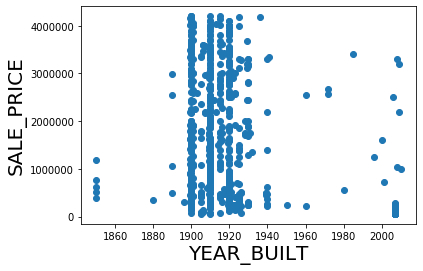

In [16]:
# Following the regression equation, our dependent variable (y) is the GPA
y = data ['SALE_PRICE']
# Similarly, our independent variable (x) is the SAT score
x1 = data ['YEAR_BUILT']
# Plot a scatter plot (first we put the horizontal axis, then the vertical axis)
plt.scatter(x1,y)
# Name the axes
plt.ylabel('SALE_PRICE', fontsize = 20)
plt.xlabel('YEAR_BUILT', fontsize = 20)
# Show the plot
plt.show()

## Regression itself

In [17]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     652.6
Date:                Mon, 09 Mar 2020   Prob (F-statistic):          1.10e-114
Time:                        17:06:28   Log-Likelihood:                -17824.
No. Observations:                1168   AIC:                         3.565e+04
Df Residuals:                    1166   BIC:                         3.566e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.268e+07   1.24e+06     26.437      0.000    3.03e+07    3.51e+07
YEAR_BUILT  -1.62e+04    634.057    -25.547      0.000   -1.74e+04    -1.5e+04
==============================================================================
Omnibus:                       64.641   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.779
Skew:                           0.620   Prob(JB):                     5.78e-17
Kurtosis:                       2.993   Cond. No.                     8.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

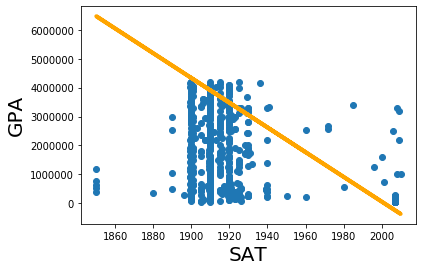

In [18]:
# Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
yhat = -4.273e+04*x1 + 8.552e+07
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
# Label the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()